In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
dailydf = pd.read_csv('Daily-tushare-20160101-20190430.csv')
dailydf = dailydf.drop('Unnamed: 0', axis=1, inplace=False)
indexdf = pd.read_csv('Index-tushare-20160101-20190430.csv')
indexdf = indexdf.drop('Unnamed: 0', axis=1, inplace=False)
daterange = indexdf.drop_duplicates(subset=['trade_date'], keep='first')['trade_date']
daterange = daterange.values.tolist()

In [3]:
indexdailydf = pd.DataFrame(daterange, columns=['trade_date'])
indexnlist = []

In [4]:
for date in indexdailydf['trade_date']:
    indexn = 0
    weights = indexdf[indexdf['trade_date']==date]
    prices = dailydf[dailydf['trade_date']==date]
    weightslist = weights['weight'].tolist()
    pricelist = []
    for con in weights['con_code']:
        price = prices[prices['ts_code']==con]
        try:
            pricelist.append(price[price['trade_date']==date]['close'].values[0])
        except:
            pricelist.append(0)
    indexn = np.multiply(np.array(weightslist)/100, np.array(pricelist)).sum()
    indexnlist.append(indexn)

In [5]:
changelist = []
for i in range(0, len(indexnlist)):
    if i != 0:
        changelist.append((indexnlist[i]-indexnlist[i-1])/indexnlist[i-1])
    else:
        changelist.append(0)

In [6]:
indexdailydf.insert(1, 'value', indexnlist)
indexdailydf.insert(2, 'change', changelist)
indexdailydf

,trade_date,value,change
0,20160104,19.604168,0.000000
1,20160129,16.549843,-0.155800
2,20160229,15.946637,-0.036448
3,20160301,16.277833,0.020769
4,20160331,19.067073,0.171352
5,20160401,18.905163,-0.008492
6,20160429,18.798592,-0.005637
7,20160503,19.443259,0.034293
8,20160531,19.172739,-0.013913
9,20160601,19.170300,-0.000127


In [7]:
indexdailydf.to_csv('Index-Daily-20160101-20190430.csv')

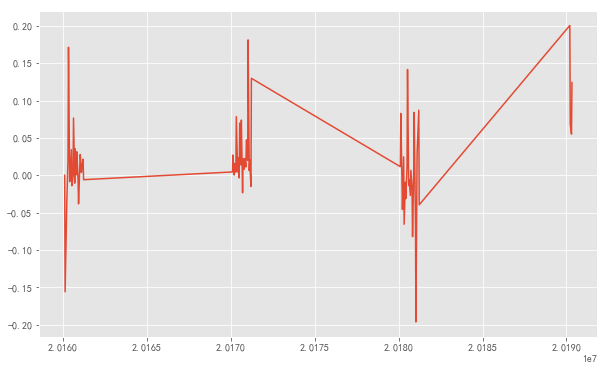

In [13]:
idplt = plt.gca()
idplt.plot(indexdailydf['trade_date'], indexdailydf['change'])

In [14]:
import pandas as pd

In [17]:
pd.to_datetime(1531224553, unit='s')

Timestamp('2018-07-10 12:09:13')

In [18]:
pd.to_datetime(1531224784, unit='s')

Timestamp('2018-07-10 12:13:04')